In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import numpy as np
import h5py
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import RandomFlip, RandomRotation, RandomZoom
from keras.layers import RandomContrast, RandomBrightness, RandomCrop, RandomTranslation

EJERCICIO 1

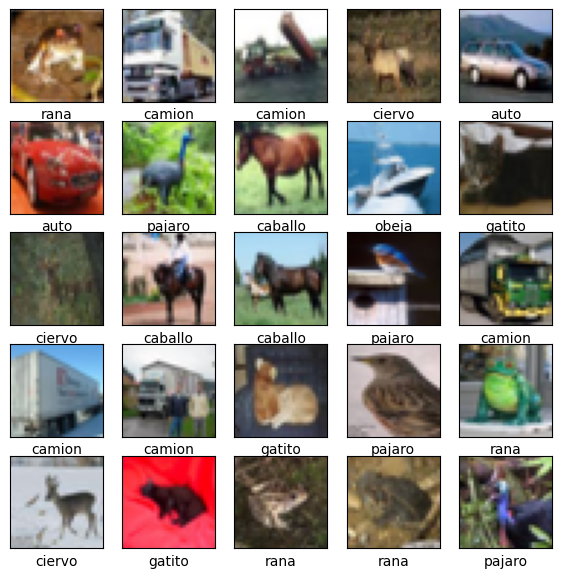

In [10]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
clases = ['aeropuerto', 'auto', 'pajaro', 'gatito', 'ciervo', 'perro', 'rana', 'caballo', 'obeja', 'camion']

plt.figure(figsize=[7,7])
for i in range (25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(clases[train_labels[i][0]])

In [11]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images/255.0
test_images = test_images/255.0

num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Flatten(input_shape=(8,8)))

model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=50,
                    validation_data=(test_images, test_labels))

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#model.save('/content/gdrive/MyDrive/Colab_Notebooks/model1.h5')

hf = h5py.File('/content/gdrive/MyDrive/Colab_Notebooks/ej1_history.h5','w')
hf.create_dataset('accuracy',data = history.history['accuracy'])
hf.create_dataset('val_accuracy',data =  np.array(history.history['val_accuracy']))
hf.create_dataset('loss',data = np.array(history.history['loss']))
hf.create_dataset('val_loss',data = np.array(history.history['val_loss']))
hf.close()

In [ ]:
hf = h5py.File('/content/gdrive/MyDrive/Colab_Notebooks/ej1_history.h5','r')
model1 = models.load_model("/content/gdrive/MyDrive/Colab_Notebooks/model1.h5")

313/313 - 14s - loss: 1.8982 - accuracy: 0.7116 - 14s/epoch - 45ms/step


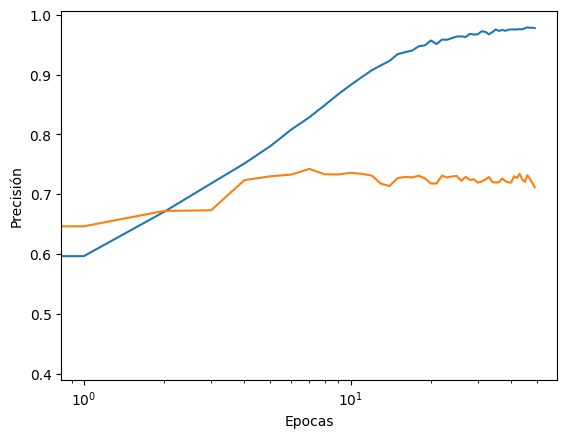

In [ ]:
plt.plot(hf['accuracy'][()], label='accuracy')
plt.plot(hf['val_accuracy'][()], label = 'val_accuracy')
plt.xlabel('Epocas')
plt.ylabel('Precisión')
#plt.ylim([0.5, 1])

plt.semilogx()


test_loss, test_acc = model1.evaluate(test_images,  test_labels, verbose=2)

La red entrenada funciona relativamente bien, ya que se observa que logra clasificar con presición la mayoria de las imagenes. El conjunto de entrenamiento se aproxima rapidamente a una presición 1 y el conjunto de validación se "estanca" en una precisión de 0.7, lo cual indica un fuerte sobreajuste de los datos. Si bien entrenamos la red con 50 epocas vemos que el resultado no difiere mucho apartir de las 10 epocas (para el conjunto de validación) Lo cual sugiere que no habra mejoras significativas aumentando las epocas de entrenamiento. Lo que si es muy importante para mejorar el modelo son aplicar alguna técnica de regularización para evitar el sobreajuste.

EJERCICIO 2

In [ ]:
def crear_modelo(epocas,dropout):

  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

# Capa dropout
  model.add(Dropout(dropout))

  model.add(Flatten(input_shape=(8,8)))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
  history = model.fit(train_images, train_labels, batch_size=64, epochs=epocas,
                    validation_data=(test_images, test_labels))

  model.save('/content/gdrive/MyDrive/Colab_Notebooks/model2_dropout'+str(dropout)+'.h5')

  hf = h5py.File('/content/gdrive/MyDrive/Colab_Notebooks/data_model2_dropout'+str(dropout)+'.hdf5','w')
  hf.create_dataset('accuracy',data = history.history['accuracy'])
  hf.create_dataset('val_accuracy',data =  np.array(history.history['val_accuracy']))
  hf.create_dataset('loss',data = np.array(history.history['loss']))
  hf.create_dataset('val_loss',data = np.array(history.history['val_loss']))
  hf.close()

def crear_modelo_2(epocas,dropout):

  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

# Capa dropout
  model.add(Dropout(dropout))

  model.add(Flatten(input_shape=(8,8)))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
  history = model.fit(train_images, train_labels, batch_size=64, epochs=epocas,
                    validation_data=(test_images, test_labels))

  model.save('/content/gdrive/MyDrive/Colab_Notebooks/model2_v2_dropout'+str(dropout)+'.h5')

  hf = h5py.File('/content/gdrive/MyDrive/Colab_Notebooks/data_model2_v2_dropout'+str(dropout)+'.hdf5','w')
  hf.create_dataset('accuracy',data = history.history['accuracy'])
  hf.create_dataset('val_accuracy',data =  np.array(history.history['val_accuracy']))
  hf.create_dataset('loss',data = np.array(history.history['loss']))
  hf.create_dataset('val_loss',data = np.array(history.history['val_loss']))
  hf.close()

In [ ]:
dropouts_list = [0.2,0.5]

for i in dropouts_list:
  crear_modelo(60,i)

for i in dropouts_list:
  crear_modelo_2(60,i)

In [ ]:
hf2 = h5py.File('/content/gdrive/MyDrive/Colab_Notebooks/data_model2_dropout0.2.hdf5')
hf5 = h5py.File('/content/gdrive/MyDrive/Colab_Notebooks/data_model2_dropout0.5.hdf5')

hf2_v2 = h5py.File('/content/gdrive/MyDrive/Colab_Notebooks/data_model2_v2_dropout0.2.hdf5')
hf5_v2 = h5py.File('/content/gdrive/MyDrive/Colab_Notebooks/data_model2_v2_dropout0.5.hdf5')

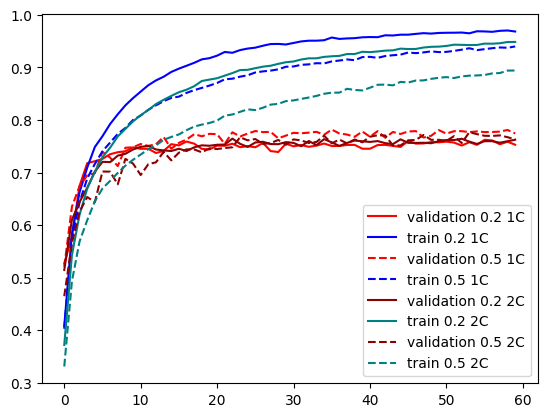

In [ ]:
plt.plot(hf2['val_accuracy'][()],color='red',ls='-',label='validation 0.2 1C')
plt.plot(hf2['accuracy'][()],color='blue',ls='-',label='train 0.2 1C')

plt.plot(hf5['val_accuracy'][()],color='red',ls='--',label='validation 0.5 1C')
plt.plot(hf5['accuracy'][()],color='blue',ls='--',label='train 0.5 1C')

plt.plot(hf2_v2['val_accuracy'][()],color='darkred',ls='-',label='validation 0.2 2C')
plt.plot(hf2_v2['accuracy'][()],color='teal',ls='-',label='train 0.2 2C')

plt.plot(hf5_v2['val_accuracy'][()],color='darkred',ls='--',label='validation 0.5 2C')
plt.plot(hf5_v2['accuracy'][()],color='teal',ls='--',label='train 0.5 2C')


plt.legend()


En el legend, 02 y 05 significan el dropout utilizado y 1C y 2C indican si el modelo tiene una capa o dos capas de dropout. Se observa que mayores valores de dropout disminuyen el sobreajuste, ya que la presicion sobre el set de entrenamiento disminuye y la presicion sobre el conjunto de validación aumenta (aunque este ultimo es muy débil). Comparativamente, encontramos que el modelo que mejor pareciera funcionar es el que incluye una capa de dropout de 0.5 (tiene la mayor precisión sobre el conjunto de validación). Aunque el comportmamiento general de todos es muy similar.

EJERCICIO 3

In [ ]:
def crear_modelo_ej3(epocas,dropout):

  model = Sequential()

  model.add(RandomFlip("horizontal", input_shape=(img_height, img_width, 3)))
  model.add(RandomRotation(0.1))
  model.add(RandomZoom(0.1))

  model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

# Capa dropout
  model.add(Dropout(dropout))

  model.add(Flatten(input_shape=(8,8)))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
  history = model.fit(train_images, train_labels, batch_size=64, epochs=epocas,
                    validation_data=(test_images, test_labels))

  model.save('/content/gdrive/MyDrive/Colab_Notebooks/model3_dropout'+str(dropout)+'.h5')

  hf = h5py.File('/content/gdrive/MyDrive/Colab_Notebooks/data_model3_dropout'+str(dropout)+'.hdf5','w')
  hf.create_dataset('accuracy',data = history.history['accuracy'])
  hf.create_dataset('val_accuracy',data =  np.array(history.history['val_accuracy']))
  hf.create_dataset('loss',data = np.array(history.history['loss']))
  hf.create_dataset('val_loss',data = np.array(history.history['val_loss']))
  hf.close()

In [ ]:
dropout = 0.5
epocas = 120
crear_modelo_ej3(epocas,dropout)

In [ ]:
hf = h5py.File('/content/gdrive/MyDrive/Colab_Notebooks/data_model3_dropout0.5.hdf5','r')
hf5_v2 = h5py.File('/content/gdrive/MyDrive/Colab_Notebooks/data_model2_v2_dropout0.5.hdf5')

Text(0, 0.5, 'accuracy')

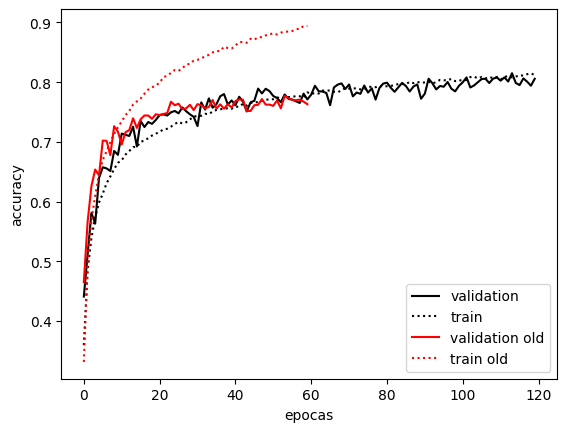

In [ ]:
plt.plot(hf['val_accuracy'][()],label='validation',color='black')
plt.plot(hf['accuracy'][()],label='train',color='black',ls='dotted')

plt.plot(hf5_v2['val_accuracy'][()],label='validation old',color='red')
plt.plot(hf5_v2['accuracy'][()],label='train old',color='red',ls='dotted')

plt.legend()
plt.xlabel('epocas')
plt.ylabel('accuracy')

En este caso vemos como el data augmentation disminuye fuertemente el sobreajuste. Cuando comparamos las curvas para el conjunto de validación vemos que ambos modelos funcionan similar en ambos casos hasta las 60 epocas. El modelo nuevo (con data augmentation) vemos que presenta, luego de 120 epocas un mejor desempeño que el modelo viejo, aunque no es posible saber si esto se debe a el data augmentation o simplemente a que tuve el doble de epocas de entrenamiento.

Me da la impresión que el modelo nuevo podría seguir mejorando con mas epocas de entrenamiento ya que pareciera que la curva de entrenamiento siempre tienen una pendiente creciente (no la veo "estancada").

EJERCICIO 4

Para diseñar una red agarre la arquitectura de la red que vimos en clase (VGG) y jugue con diferentes valores de dropout, poner dropout en diferentes lugares (entre las redes densas, convoluciones, etc), probe diferentes numeros de filtros para las convoluciones, probe 2 o 3 convoluciones o diferente numeros de redes para la parte densa. Lo mejor que encontre fue la arquitectura que pongo aca abajo (para crear la red use el programa que esta al final del notebook).

In [ ]:
#model = Sequential()
#model.add(RandomFlip("horizontal", input_shape=(img_height, img_width, 3)))
#model.add(RandomRotation(0.1))
#model.add(RandomZoom(0.1))
#
#model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
#model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.1))
#
#model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.1))
#
#model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.1))
#
#model.add(Flatten(input_shape=(8,8)))
#
#model.add(Dense(128, activation='relu'))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(10, activation='softmax'))
#
#model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
m0 = h5py.File('data_model_base2.h5','r')
m1 = h5py.File('data_model.h5','r')

Text(0, 0.5, 'accuracy')

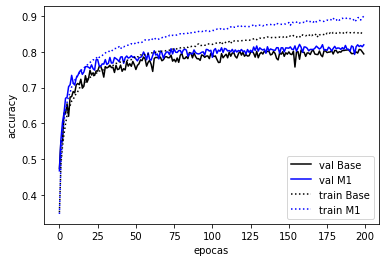

In [ ]:
plt.plot(m0['val_accuracy'][()],color='black',ls='-',label='val Base')
plt.plot(m1['val_accuracy'][()],color='blue',label='val M1')

plt.plot(m0['accuracy'][()],color='black',ls='dotted',label='train Base')
plt.plot(m1['accuracy'][()],color='blue',ls='dotted',label='train M1')

plt.legend()
plt.xlabel('epocas')
plt.ylabel('accuracy')
#plt.xlim(0,100)

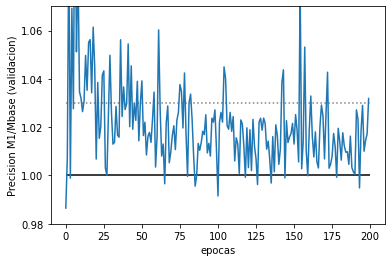

In [ ]:
plt.plot(m1['val_accuracy'][()]/m0['val_accuracy'][()])

plt.xlabel('epocas')
plt.ylabel('Precision M1/Mbase (validacion)' )
plt.ylim(.98,1.07)
plt.hlines(y=1, xmin=0, xmax =200, color='black')

plt.hlines(y=1.03,xmin=0,xmax=200,color='grey',ls='dotted')

En general el nuevo diseño funciona mejor que el anterior ya que vemos que consistentemente mantiene siempre un mejor desempeño (alrededor del 2 %) con cualquier número de epocas de entrenamiento. La red final entrenada con 200 epocas tiene una mejora del error del 3 %. Las mayores diferencias se logran con pocas epocas de entrenamiento (menos de 30) donde la arquitectura nueva tiene mejoras de hasta 7%.

El nuevo diseño tiene sobreajuste ya que mantiene una presicion del 90 % para el conjunto de entrenamiento y una del 80% para el conjunto de test. Quizas habria que utilizar tecnicas de data augmentation para evitarlo. Me sorprendio no lograr mejoras de desempeño agregando mas dropout a la red, ya que esperaba disminuir el sobreajuste y mejorar el desempeño de la red incluyendo dropout pero no fue asi.

In [13]:
asd = models.load_model("/content/gdrive/MyDrive/Colab_Notebooks/model4.h5")
test_loss, test_acc = asd.evaluate(test_images,  test_labels, verbose=2)

313/313 - 19s - loss: 0.6213 - accuracy: 0.8156 - 19s/epoch - 61ms/step


In [14]:
predictions = asd.predict(test_images)

313/313 [==============================] - 26s 82ms/step


In [15]:
clases_predichas = []
for i in range(len(predictions)):
    clases_predichas.append(np.argmax(predictions[i]))

clases_reales = []
for i in range(len(test_labels)):
    clases_reales.append(np.argmax(test_labels[i]))

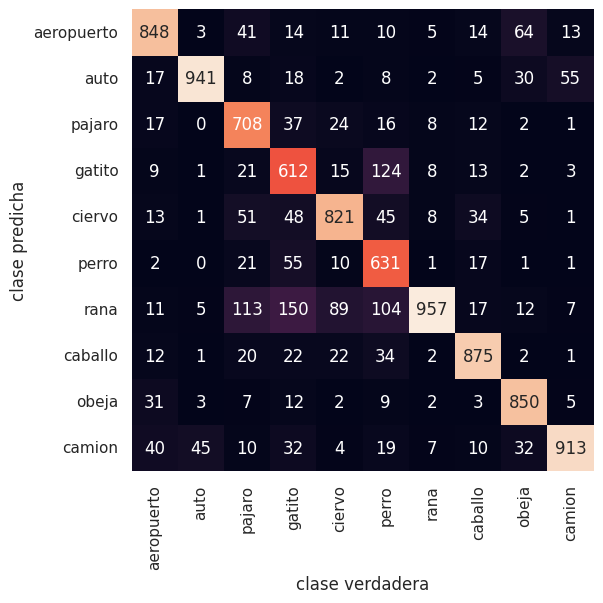

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.set()

plt.figure(figsize=(6,6))
#test = fetch_20newsgroups(subset="test")
mat = confusion_matrix(clases_reales, clases_predichas)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=clases, yticklabels=clases)
plt.xlabel('clase verdadera')
plt.ylabel('clase predicha');

La matriz de confusión muestra un comportamiento razonable. La mayor confusión del clasificador se da entre las clases 3 y 5 que son perros y gatos, donde alrededor de un 40 % son mal clasificados. En general, muchos perros y gatos son clasificados al revez o como ranas. Sin embargo, el clasificador si clasifica bien a las ranas. Lo cual me resulta curioso.  El resto de las clases tienen una presicion superior al 85 % con lo cual vemos que la mayor fuente de la disminución en la presicion viene de las clases perro y gato. Quizás lo optimo sería aumentar el numero de perros y gatos en el set de entrenamiento para mejorar la presicion de esta clasificación.

EJERCICIO 5

Para mejorar la capa de data augmentation agregue variacion de contraste y de brillo. Tambien cambie un poco los parametros de la capa vieja para intentar mejorar el desempeño. La arquitectura sería la siguiente (al final del notebook esta el programa completo):

In [ ]:
#model = Sequential()

## DATA AUGMENTATION

#model.add(RandomContrast(0.1))
#model.add(RandomBrightness( factor=0.1, value_range=(0, 1)))
#model.add(RandomFlip("horizontal", input_shape=(img_height, img_width, 3)))
#model.add(RandomRotation(0.1))
#model.add(RandomZoom(0.15))


#model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
#model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.1))
#model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.1))
#model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.1))
#model.add(Flatten(input_shape=(8,8)))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(10, activation='softmax'))

#model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [5]:
m1 = h5py.File('/content/gdrive/MyDrive/Colab_Notebooks/data_model5.h5','r')
m0 = h5py.File('/content/gdrive/MyDrive/Colab_Notebooks/data_model.h5','r')

Text(0, 0.5, 'accuracy')

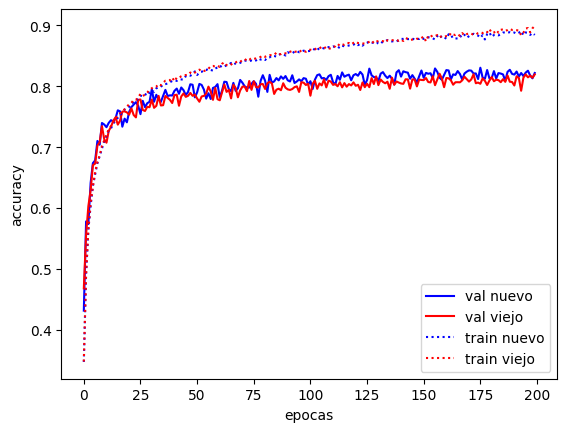

In [6]:
plt.plot(m1['val_accuracy'][()],color='blue',label='val nuevo')
plt.plot(m0['val_accuracy'][()],color='red',label='val viejo')

plt.plot(m1['accuracy'][()],color='blue',ls='dotted',label='train nuevo')
plt.plot(m0['accuracy'][()],color='red',ls='dotted',label='train viejo')

plt.legend()
plt.xlabel('epocas')
plt.ylabel('accuracy')
#plt.xlim(0,150)

El nuevo modelo presenta un mejor desempeño que el viejo (que es el del ejercicio anterior). Podemos ver como practivamente para cualquier numero de epocas de entrenamiento logramos un desempeño un poquitito mejor. Con esta nueva capa no solo agregamos generalizacion por el movimiento de la imagen (posicion, zoom) sino que tambien por los colores de las mismas.

In [ ]:
P

**PROGRAMA EJ 4**

In [ ]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import numpy as np
import h5py
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import RandomFlip, RandomRotation, RandomZoom


epocas = 200


(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Standardizing (255 is the total number of pixels an image can have)
train_images = train_images / 255.0
test_images = test_images / 255.0

# One hot encoding the target class (labels)
num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

img_height = 32
img_width = 32

model = Sequential()
# data augmentation
model.add(RandomFlip("horizontal", input_shape=(img_height, img_width, 3)))
model.add(RandomRotation(0.1))
model.add(RandomZoom(0.1))



model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten(input_shape=(8,8)))

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=64, epochs=epocas,#verbose=0,
                    validation_data=(test_images, test_labels))

model.save('/home/arodriguez/IntroML/model4.h5')

hf = h5py.File('/home/arodriguez/IntroML/data_model.h5','w')
hf.create_dataset('accuracy',data = history.history['accuracy'])
hf.create_dataset('val_accuracy',data =  np.array(history.history['val_accuracy']))
hf.create_dataset('loss',data = np.array(history.history['loss']))
hf.create_dataset('val_loss',data = np.array(history.history['val_loss']))
hf.close()

**PROGRAMA EJ 5**

In [ ]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import numpy as np
import h5py
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.layers import RandomFlip, RandomRotation, RandomZoom
from keras.layers import RandomContrast, RandomBrightness, RandomCrop, RandomTranslation

epocas = 200


(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Standardizing (255 is the total number of pixels an image can have)
train_images = train_images / 255.0
test_images = test_images / 255.0

# One hot encoding the target class (labels)
num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

img_height = 32
img_width = 32

model = Sequential()
# data augmentation


model.add(RandomContrast(0.1))
model.add(RandomBrightness( factor=0.1, value_range=(0, 1)))

model.add(RandomFlip("horizontal", input_shape=(img_height, img_width, 3)))
model.add(RandomRotation(0.1))
model.add(RandomZoom(0.15))


model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten(input_shape=(8,8)))

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=64, epochs=epocas,#verbose=0,
                    validation_data=(test_images, test_labels))

model.save('/home/arodriguez/IntroML/model5.h5')

hf = h5py.File('/home/arodriguez/IntroML/data_model5.h5','w')
hf.create_dataset('accuracy',data = history.history['accuracy'])
hf.create_dataset('val_accuracy',data =  np.array(history.history['val_accuracy']))
hf.create_dataset('loss',data = np.array(history.history['loss']))
hf.create_dataset('val_loss',data = np.array(history.history['val_loss']))
hf.close()